In [10]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt

def get_data_from_file(train_file):
    train_data = []
    with open('train_list.txt') as fp:
        for line in fp:
            a=line.strip().split("/")
            img_path=a[0]+"\\"+a[1]
            try:
                img = cv2.imread(img_path)
                #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img_resized = cv2.resize(img, (48, 48))
                
                if 'Cat' in img_path:
                    label = 0
                elif 'Dog' in img_path:
                    label = 1

                train_data.append([img_resized,label])
            except:
                print ('error message')
    return train_data
      

def get_image_and_label(train_data):
    listname=[]
    listindex=[]
    for i in range(len(train_data)):
        listname.append(train_data[i][0])
        listindex.append(train_data[i][1])
        
    listname=np.array(listname)
    listindex=np.array(listindex)
    print(listname.shape)
    return listname,listindex
def assignment3b_1():
    train_file = 'train_list.txt'
    test_file = 'test_list.txt'
    
    train_data = get_data_from_file(train_file)
    X_train, Y_train = get_image_and_label(train_data)
    
    test_data = get_data_from_file(test_file)    
    X_test, Y_test = get_image_and_label(test_data)
    
    save_path = 'dogs_cats.pkl' 
    print('Saving to', save_path)
    data = {}
    data['X_train'] = X_train
    data['Y_train'] = Y_train
    data['X_test'] = X_test
    data['Y_test'] = Y_test
    pickle.dump(data, open(save_path, 'wb'))
    

def assignment3b_2():
    data = pickle.load(open("dogs_cats.pkl","rb"))
    X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    model=build_model ()
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    
    
    history=model.fit(X_train, Y_train ,verbose = 2, epochs=100 , batch_size = 64  )
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    
    test_loss, test_acc = model.evaluate(X_test, Y_test)
   
        
    '''
    for i in range(reg.shape[0]):
        if reg[i]>0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    '''
    

def assignment3b_3():
    data = pickle.load(open("dogs_cats.pkl","rb"))
    X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48,48,3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1, activation='linear')])
        
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'] )
    history=model.fit(X_train, Y_train , epochs=100 , batch_size = 64 )
    plt.plot(history.history['loss'])
    
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    
    plt.show()
    prediction=[]
    reg = model.predict(X_test).squeeze()
    test_loss, test_acc = model.evaluate(X_test, Y_test)
    predictions = np.empty((reg.shape[0]))
    for i in range(reg.shape[0]):
        if (reg[i]>0.5):
            predictions[i]=1
        else:
            predictions[i]=0
    acc=len(predictions[predictions==Y_test]) /len(Y_test)
    
    print("test_accurancy: %.4f" %acc)
        
  # enter your code here

def build_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48,48,3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)])
    model.summary()
    return model    
data_dir = 'PetImages'
img_size = 48

if __name__ == '__main__':
    assignment3b_1()
    



error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
(4986, 48, 48, 3)
error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
error message
(4986, 48, 48, 3)
Saving to dogs_cats.pkl


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               1769728   
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 258       
Total params: 1,868,674
Trainable params: 1,868,674
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
78/78 - 1s - loss: 0.7971 - accuracy: 0.5259
Epoch 2/100
78/78 - 0s - loss: 0.6878 - accuracy: 0.5

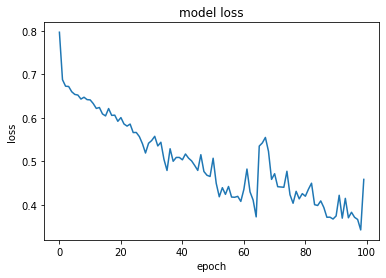

156/156 [==============================] - 1s 2ms/step - loss: 0.4384 - accuracy: 0.7529


In [11]:
assignment3b_2()

Epoch 1/100
78/78 [==============================] - 1s 4ms/step - loss: 3.2748 - accuracy: 0.5148
Epoch 2/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2793 - accuracy: 0.5263
Epoch 3/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2766 - accuracy: 0.5455
Epoch 4/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2927 - accuracy: 0.5473
Epoch 5/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2759 - accuracy: 0.5664
Epoch 6/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2865 - accuracy: 0.5527
Epoch 7/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2671 - accuracy: 0.5686
Epoch 8/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2519 - accuracy: 0.5780
Epoch 9/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2596 - accuracy: 0.5884
Epoch 10/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2689 - accuracy: 0.5732
Epoch 11/

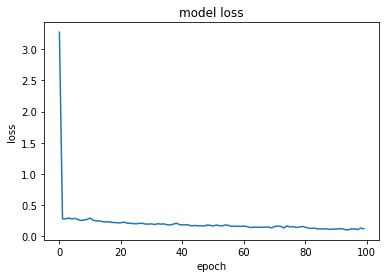

156/156 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.8444
test_accurancy: 0.8444


In [12]:
assignment3b_3()

In [13]:
sparse_categorical_crossentropy之收斂比較平滑準確率也較高mean squared error loss下降到一定程度之後就很難再下降了

SyntaxError: invalid syntax (Temp/ipykernel_19288/955486465.py, line 1)